 EDA & Ensemble Model (Top 10 Percentile)
* https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile


# import modules

In [116]:
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats #stats : statistics
#SciPy('사이파이'라고 읽음)는 과학기술계산을 위한 Python 라이브러리이다.
#NumPy, Matplotlib, pandas, SymPy와 연계되어 있다(""특히 NumPy와""). 가능한 알고리즘과 관련 패키지는 다음과 같다
# https://wikidocs.net/15636
import missingno as msno
#결측치 확인 msno.matrix == sns.heatmap(df.isnull(), cbar = False)
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
# 사본 작업 시 소스 데이터에 영향을 미치지 않게 하기 = copy()
# pd.options.mode.chained_assignment = old_ca # restore

warnings.filterwarnings("ignore", category = DeprecationWarning)
%matplotlib inline


# Data Summary

In [117]:
# read data
dailyData = pd.read_csv("./data/train.csv")

### shape of dataset

In [128]:
#shape of the dataset
rows, cols = dailyData.shape
print(f"num of rows : {rows}\nnum of cols : {cols}")

num of rows : 10886
num of cols : 16


### Sample Of First Few Rows

In [119]:
#sample of few rows
dailyData.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


### Sample of last few rows

In [129]:
#sample of few rows
dailyData.tail(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
10883,2012-12-19 21:00:00,Winter,0,1,Clear + Few clouds + Partly cloudy + Partly c...,13.94,15.910,61,15.0013,4,164,168,2012-12-19,21,Wednesday,December
10884,2012-12-19 22:00:00,Winter,0,1,Clear + Few clouds + Partly cloudy + Partly c...,13.94,17.425,61,6.0032,12,117,129,2012-12-19,22,Wednesday,December
10885,2012-12-19 23:00:00,Winter,0,1,Clear + Few clouds + Partly cloudy + Partly c...,13.12,16.665,66,8.9981,4,84,88,2012-12-19,23,Wednesday,December


### Variables Date type

In [121]:
# variable Data Type
dailyData.info()
# dailyData.dtypes 노트에서 사용한 코드

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### describe variables

In [122]:
#기술통계량
dailyData.describe(include = "all")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2012-02-01 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


# Feature Engineering

### creating new columns for visualization

In [123]:
#datetime으로 일자,시간 컬럼 생성
dailyData["date"] = dailyData.datetime.apply(lambda x : x.split()[0])
dailyData["hour"] = dailyData.datetime.apply(lambda x : x.split()[1].split(":")[0])
dailyData["weekday"] = dailyData.date.apply(lambda x : calendar.day_name[datetime.strptime(x,"%Y-%m-%d").weekday()]) #ref. note 코드 130 ms ± 1.83 ms per loop
# dailyData["weekday"] = dailyData.date.apply(lambda x : calendar.day_name[pd.to_datetime(x).weekday()]) #내 코드 902 ms ± 15.2 ms per loop
dailyData["month"] = dailyData.date.apply(lambda x : calendar.month_name[datetime.strptime(x, "%Y-%m-%d").month])
dailyData["season"] = dailyData.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
dailyData["weather"] = dailyData.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", 
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", 
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })
dailyData.head(3) # ref.code에선 weather 생서 시 줄을 이어주기 위해 \를 표시했으나, 현 버전에선 불필요함

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,2011-01-01 00:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday,January
1,2011-01-01 01:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday,January
2,2011-01-01 02:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday,January


In [124]:
dailyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  object 
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  object 
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  date        10886 non-null  object 
 13  hour        10886 non-null  object 
 14  weekday     10886 non-null  object 
 15  month       10886 non-null  object 
dtypes: float64(3), int64(6), object(7)
memory usage: 1.3+ MB


### Coercing To category Type

In [131]:
categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]
for var in categoryVariableList:
    dailyData[var] = dailyData[var].astype("category")

### Dropping uncessary Columns

In [136]:
dailyData = dailyData.drop("datetime",axis=1)

### Lets start with very simple visualization of variables data type count

In [192]:
DataType = dailyData.dtypes.value_counts().reset_index().rename(columns = {"index" : "varType", 0 : "count"})
DataType["varType"] = DataType["varType"].astype(str) #varType은 Dtype이므로 string으로 바꿔줘야 함

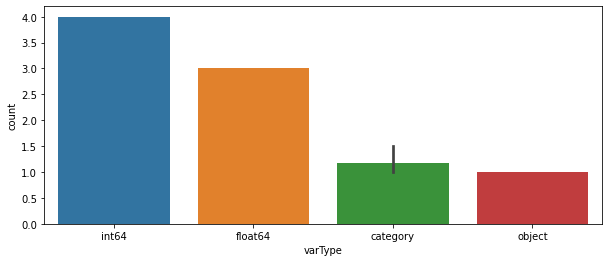

In [193]:
fig,ax = plt.subplots(1,1, figsize = (10,4))
sns.barplot(data = DataType, x = "varType", y = "count", ax = ax)
# ax.bar(data = DataType, x = "varType", height = "count")

 # Missing Value analysis

In [197]:
dailyData.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
date          0
hour          0
weekday       0
month         0
dtype: int64

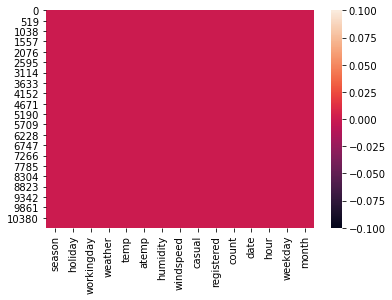

In [199]:
sns.heatmap(dailyData.isnull())

# Skewness in Distribution